Chelsea Jaculina

DATA 255 Assignment #4

October 6, 2025

## Import Required Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Libraries

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries successfully loaded")

Libraries successfully loaded


## Load Data

In [3]:
def load_data(path):
    data = pd.read_csv(path).values

    X = data[:, 1:] / 255.0  # Normalize pixel values to [0, 1]
    y = data[:, 0].astype(int)  # Make sure labels are integers (not floats)


    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)

    return X_tensor, y_tensor

# Load binary MNIST train and test sets
X_train, y_train = load_data("/content/drive/MyDrive/MSDA 2024-2026/04 Fall 2025/DATA 255 - Deep Learning/mnist_train.csv")
X_test, y_test = load_data("/content/drive/MyDrive/MSDA 2024-2026/04 Fall 2025/DATA 255 - Deep Learning/mnist_test.csv")

print(f"Loaded {len(X_train)} training samples successfully")
print(f"Loaded {len(X_test)} test samples successfully")

def one_hot(y, num_classes=10):
    return torch.eye(num_classes)[y]

y_train_onehot = one_hot(y_train)
y_test_onehot = one_hot(y_test)

print("One-hot encoding successfully defined")

Loaded 11339 training samples successfully
Loaded 1850 test samples successfully
One-hot encoding successfully defined


## 1. Build Deep Neural Network

Define Activation Functions

In [4]:
# for hidden layer
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# for output layer
def softmax(z):
    z_stable = z - torch.max(z, dim=1, keepdim=True).values
    exp_z = torch.exp(z_stable)
    return exp_z / torch.sum(exp_z, dim=1, keepdim=True)

print("Activation functions successfully defined")

Activation functions successfully defined



Define Intializations

In [5]:
input_size = 784
hidden_size = 100
output_size = 10  # 10 classes for multi-class classification

torch.manual_seed(0)  # For reproducibility

# Xavier Initialization for sigmoid activations
w1 = torch.randn((input_size, hidden_size), dtype=torch.float32) * (1.0 / (input_size ** 0.5))
w2 = torch.randn((hidden_size, output_size), dtype=torch.float32) * (1.0 / (hidden_size ** 0.5))

# Biases
b1 = torch.zeros((hidden_size,), dtype=torch.float32)
b2 = torch.zeros((output_size,), dtype=torch.float32)

print("Initializations successfully defined")

Initializations successfully defined


Define Accuracy function

In [6]:
def accuracy(y_pred, y_true):
    pred_labels = torch.argmax(y_pred, dim=1)
    return (pred_labels == y_true).float().mean().item()

print("Accuracy function successfully defined")

Accuracy function successfully defined


In [7]:
def cross_entropy_loss(y_pred, y_true_onehot):
    epsilon = 1e-8
    return -torch.mean(torch.sum(y_true_onehot * torch.log(y_pred + epsilon), dim=1))

print("Cross entropy loss function for multi-classificiation successfully defined")

Cross entropy loss function for multi-classificiation successfully defined


Define Forward Pass from scratch

In [8]:
def forward_pass(X):
    z1 = X @ w1 + b1           # Hidden layer linear transformation
    a1 = sigmoid(z1)           # Apply sigmoid activation
    z2 = a1 @ w2 + b2          # Output layer linear transformation
    y_pred = softmax(z2)       # Apply softmax activation
    return z1, a1, z2, y_pred

print("Forward pass function successfully defined")

Forward pass function successfully defined


Define Basckward Pass from scratch

In [9]:
def backward_pass(X, y_true_onehot, z1, a1, y_pred):
    m = X.shape[0]

    # Gradient of softmax + cross entropy
    dz2 = y_pred - y_true_onehot
    dw2 = a1.T @ dz2 / m
    db2 = dz2.mean(dim=0)

    da1 = dz2 @ w2.T
    dz1 = da1 * sigmoid_derivative(z1)
    dw1 = X.T @ dz1 / m
    db1 = dz1.mean(dim=0)

    return dw1, db1, dw2, db2

print("Backward pass function successfully defined")

Backward pass function successfully defined


# 2. Training


Define learning rate and # of epochs


In [10]:
lr = 0.1
epochs = 15
train_accs, test_accs = [], []

print("Hyperparameters successfully defined")

Hyperparameters successfully defined


Train the neural network using gradient descent from scratch

Print accuracy for training and testing set for at least 10 different epochs

In [11]:
print(f"Learning Rate @", lr);
for epoch in range(epochs):
    # Forward pass
    z1, a1, z2, y_pred = forward_pass(X_train)

    # Loss and accuracy
    loss = cross_entropy_loss(y_pred, y_train_onehot)
    acc = accuracy(y_pred, y_train)
    train_accs.append(acc)

    # Backward pass (use one-hot labels)
    dw1, db1, dw2, db2 = backward_pass(X_train, y_train_onehot, z1, a1, y_pred)

    # Manual gradient descent updates
    w1 -= lr * dw1
    b1 -= lr * db1
    w2 -= lr * dw2
    b2 -= lr * db2

    # Evaluate on test set
    _, _, _, y_test_pred = forward_pass(X_test)
    test_loss = cross_entropy_loss(y_test_pred, y_test_onehot)
    test_acc = accuracy(y_test_pred, y_test)
    test_accs.append(test_acc)

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {loss.item():.4f} | Train Acc: {acc:.4f} | Test Acc: {test_acc:.4f}")

Learning Rate @ 0.1
Epoch 1/15 | Train Loss: 2.3596 | Train Acc: 0.0000 | Test Acc: 0.4827
Epoch 2/15 | Train Loss: 1.3549 | Train Acc: 0.4785 | Test Acc: 0.7654
Epoch 3/15 | Train Loss: 0.9821 | Train Acc: 0.7461 | Test Acc: 0.7286
Epoch 4/15 | Train Loss: 0.8458 | Train Acc: 0.7048 | Test Acc: 0.8022
Epoch 5/15 | Train Loss: 0.7746 | Train Acc: 0.7945 | Test Acc: 0.8465
Epoch 6/15 | Train Loss: 0.7283 | Train Acc: 0.8388 | Test Acc: 0.8719
Epoch 7/15 | Train Loss: 0.6941 | Train Acc: 0.8701 | Test Acc: 0.8897
Epoch 8/15 | Train Loss: 0.6666 | Train Acc: 0.8887 | Test Acc: 0.9011
Epoch 9/15 | Train Loss: 0.6433 | Train Acc: 0.9015 | Test Acc: 0.9065
Epoch 10/15 | Train Loss: 0.6227 | Train Acc: 0.9090 | Test Acc: 0.9178
Epoch 11/15 | Train Loss: 0.6041 | Train Acc: 0.9181 | Test Acc: 0.9216
Epoch 12/15 | Train Loss: 0.5870 | Train Acc: 0.9234 | Test Acc: 0.9265
Epoch 13/15 | Train Loss: 0.5709 | Train Acc: 0.9274 | Test Acc: 0.9292
Epoch 14/15 | Train Loss: 0.5557 | Train Acc: 0.9307 

Visualize the output of the model once it is trained

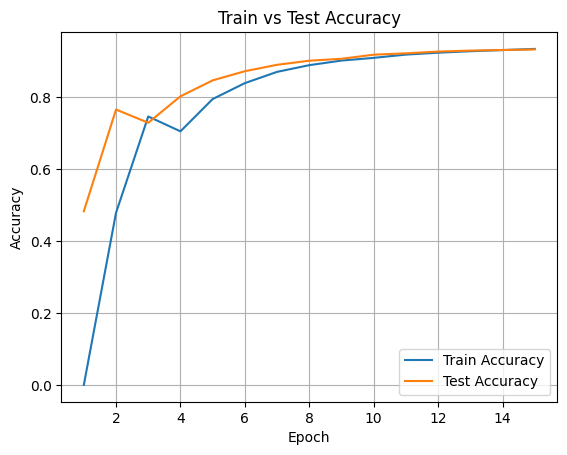

In [12]:
plt.plot(range(1, epochs + 1), train_accs, label="Train Accuracy")
plt.plot(range(1, epochs + 1), test_accs, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()